In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from pathlib import Path

In [30]:
data = dict()
ppl = ["Yihong1"]
locs = ["middle", "topright", "bottomright", "bottomleft", "topleft"]
augs = ["M1", "NA", "R1"]
for pers in ppl:
    data[pers] = dict()
    for loc in locs:
        data[pers][loc] = dict()
        for aug in augs:
            _arr = loadmat(f"{pers}_{aug}_{loc}_filteredEvents.mat")
            # print(_arr) filteredEvents
            data[pers][loc][aug] = [x[0] for x in _arr["filteredEvents"].flatten()]
            

In [137]:
# data["MP2"]["middle"]["M1"]

[array([-1.92647766, -1.92647766, -1.92647766, ..., -0.92647766,
        -0.92647766, -1.92647766]),
 array([ 2.07352234,  2.07352234,  0.07352234, ..., -0.92647766,
        -0.92647766, -0.92647766]),
 array([1.07352234, 1.07352234, 1.07352234, ..., 4.07352234, 3.07352234,
        0.07352234]),
 array([ 0.07352234,  0.07352234,  1.07352234, ..., -0.92647766,
        -0.92647766,  1.07352234]),
 array([2.07352234, 1.07352234, 1.07352234, ..., 1.07352234, 1.07352234,
        0.07352234]),
 array([ 0.07352234, -0.92647766, -0.92647766, ..., -0.92647766,
        -0.92647766, -0.92647766]),
 array([-2.92647766, -1.92647766, -1.92647766, ..., -1.92647766,
         0.07352234, -0.92647766]),
 array([ 1.07352234,  0.07352234,  1.07352234, ...,  0.07352234,
        -0.92647766, -0.92647766]),
 array([-1.92647766, -0.92647766,  0.07352234, ...,  2.07352234,
         2.07352234,  1.07352234]),
 array([1.07352234, 1.07352234, 2.07352234, ..., 1.07352234, 1.07352234,
        0.07352234])]

[-0.90238028 -0.90238028  0.09761972 ...  2.09761972 -5.90238028
  0.09761972]


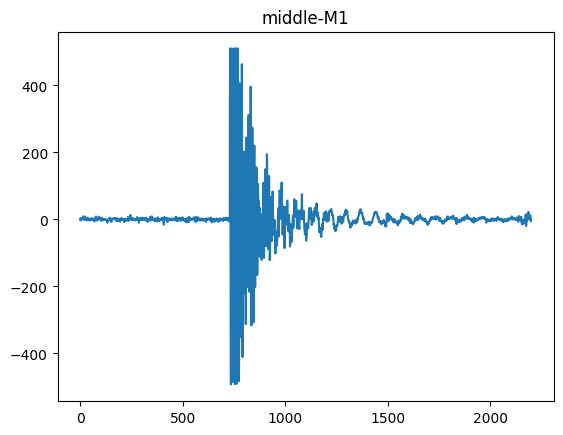

[-0.82298332 -0.82298332 -0.82298332 ...  4.17701668  2.17701668
  3.17701668]


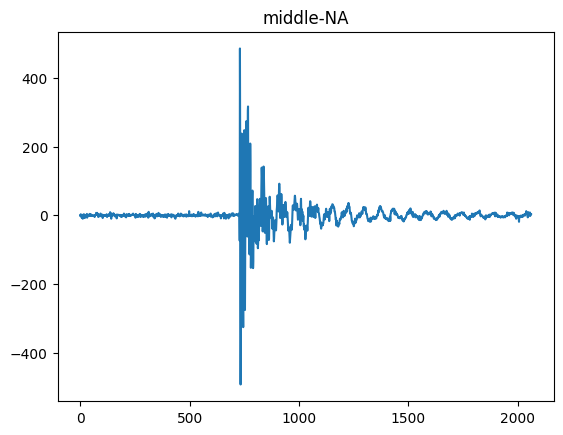

[ 0.12814709  0.12814709  0.12814709 ... -2.87185291  2.12814709
 -0.87185291]


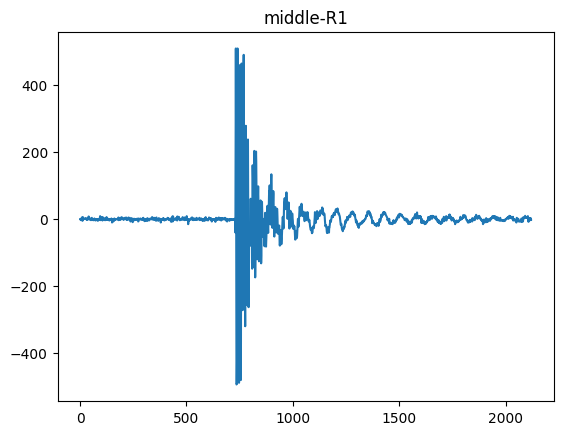

[-1.87455312 -3.87455312 -4.87455312 ...  4.12544688  6.12544688
  5.12544688]


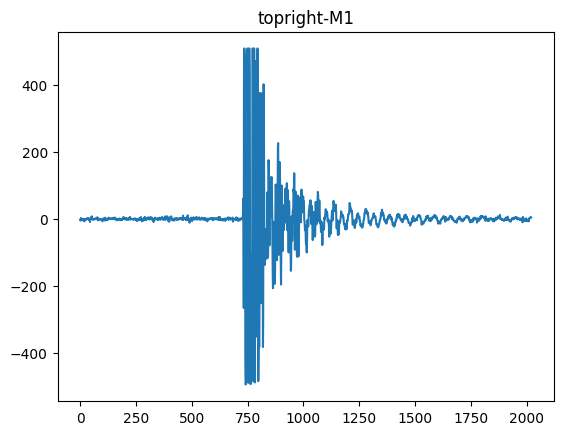

[ 1.13974268  1.13974268  1.13974268 ...  1.13974268  0.13974268
 -6.86025732]


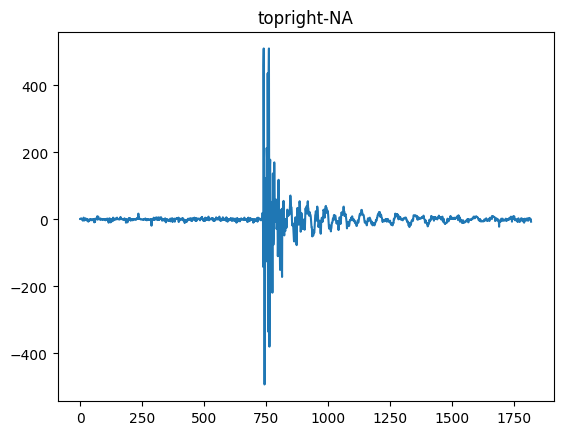

[ 0.1258233  2.1258233  0.1258233 ...  1.1258233 -0.8741767 -1.8741767]


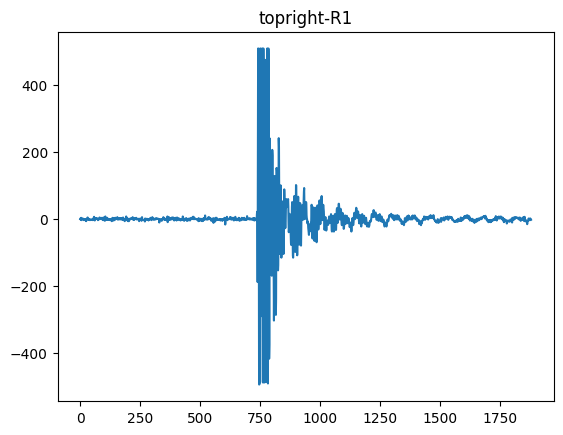

[-0.87389284 -0.87389284 -1.87389284 ...  5.12610716  4.12610716
  4.12610716]


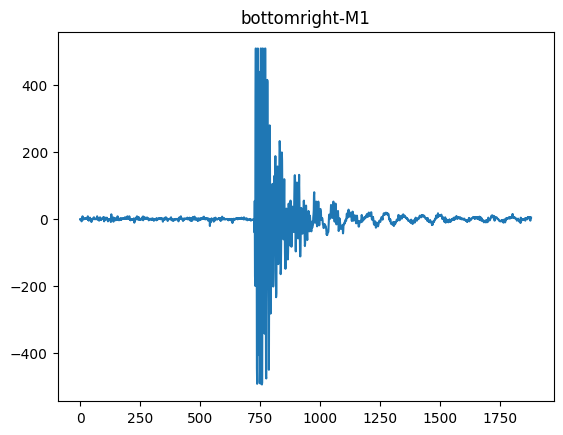

[0.13893894 1.13893894 2.13893894 ... 4.13893894 8.13893894 3.13893894]


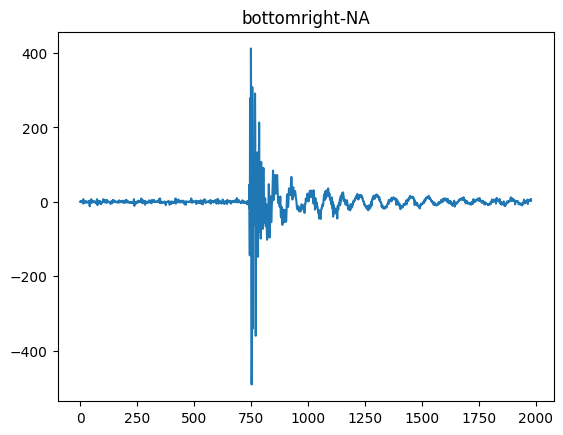

[ 1.12693576 -1.87306424  2.12693576 ... -4.87306424  0.12693576
 -2.87306424]


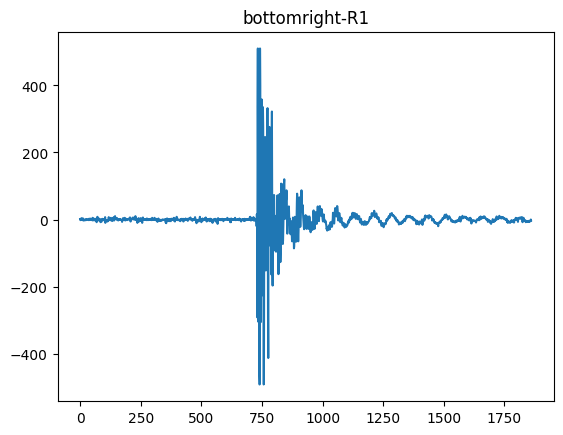

[ 0.1156724 -0.8843276  2.1156724 ... -0.8843276  0.1156724  0.1156724]


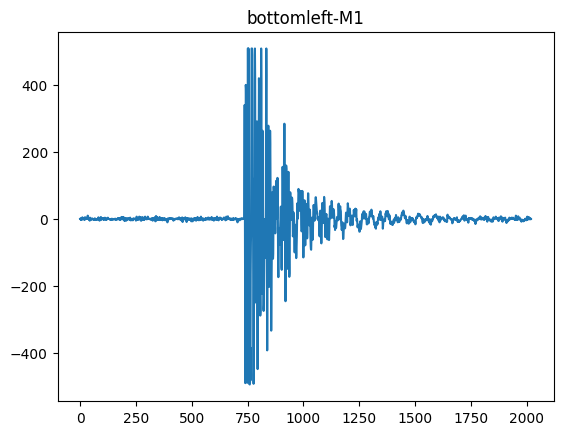

[ 3.13132881  3.13132881 -0.86867119 ...  2.13132881  4.13132881
  6.13132881]


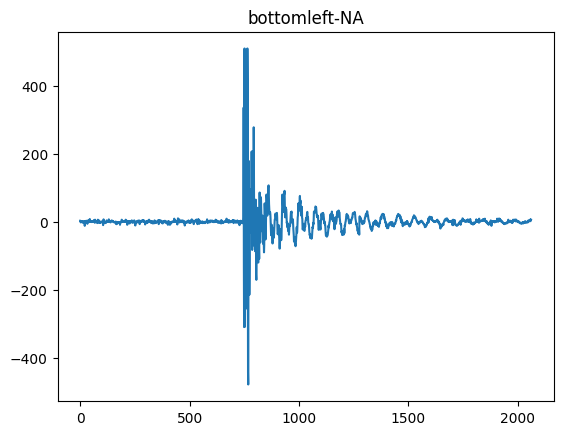

[-0.8616448  0.1383552  0.1383552 ... -1.8616448 -2.8616448 -2.8616448]


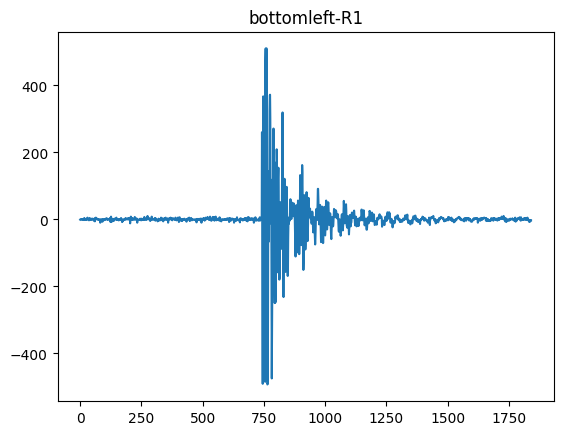

[-4.86930299  6.13069701 -6.86930299 ... -0.86930299 -3.86930299
 -3.86930299]


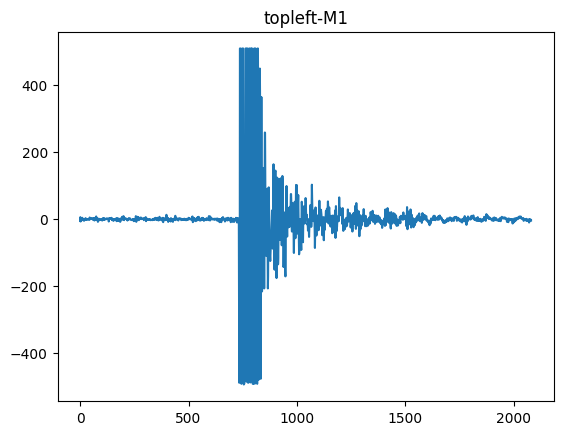

[-3.86402789  1.13597211 -0.86402789 ...  3.13597211 -0.86402789
 -3.86402789]


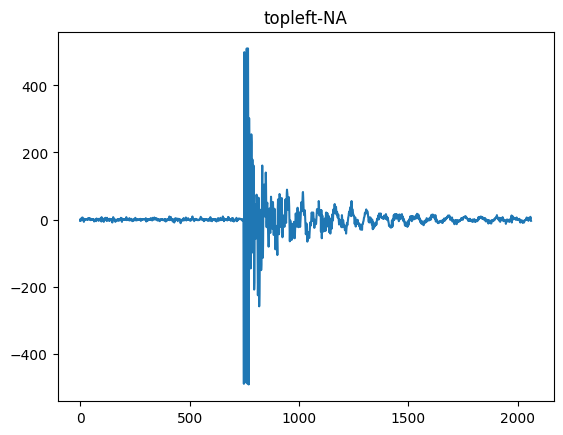

[ 1.14962862 -0.85037138 -1.85037138 ...  5.14962862  8.14962862
  1.14962862]


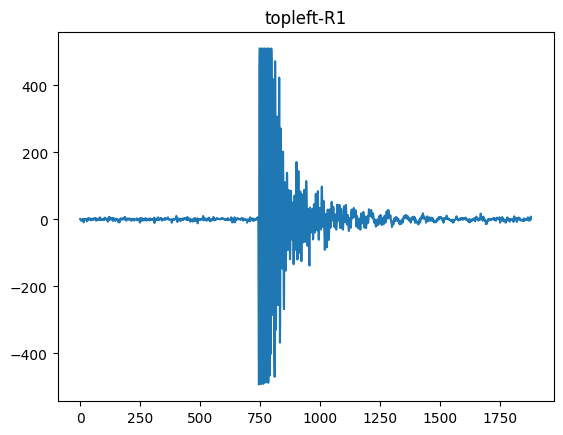

In [35]:
for loc in locs:
    for aug in augs:
        ex = data["Yihong1"][loc][aug][0]
        print(ex)
        plt.plot(ex)
        plt.title(f"{loc}-{aug}")
        plt.show()

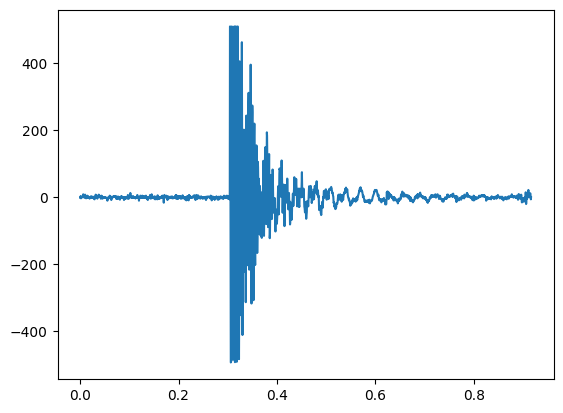

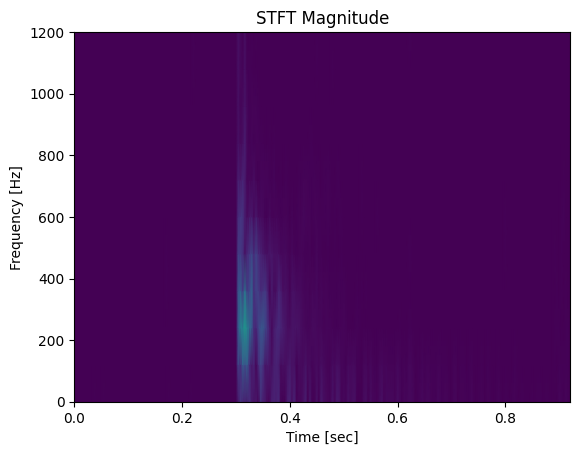

(1,) (222,) (1, 222)


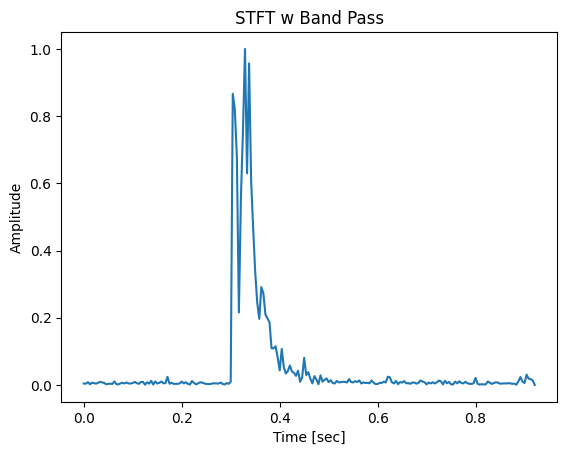

In [32]:
# example MP2 middle R1 / NA
from scipy import signal
for loc in ["middle"]:
    ex = data["Yihong1"][loc]["M1"][0]
    # raw
    plt.plot(np.arange(0,len(ex) / 2400,1/2400),ex)
    plt.savefig("raw_ex")
    plt.show()
    # stft
    # ex = data["Dong1"][loc]["R1"][0]
    f, t, Zxx = signal.stft(ex,2400, nperseg=20)
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=ex.max(), shading='gouraud')
    plt.title('STFT Magnitude')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.savefig("stft_ex")
    plt.show()

    
    # band pass 400 - 600 Hz
    band = np.where(np.logical_and(f > 400, f < 600))
    f_band_pass = f[band]
    Zxx_band_pass = Zxx[band]
    # set to normalized scale
    exp = np.max(np.abs(Zxx_band_pass))
    # print(exp)
    Zxx_band_pass = Zxx_band_pass / exp
    print(f_band_pass.shape, t.shape, Zxx_band_pass.shape)
    plt.plot(t, np.abs(Zxx_band_pass[0]))
    plt.title('STFT w Band Pass')
    plt.ylabel('Amplitude')
    plt.xlabel('Time [sec]')
    plt.savefig("band_pass_ex")
    plt.show()
    

In [24]:
np.savetxt("sample_signal.csv", data["Dong1"][loc]["R1"][0], delimiter=',')

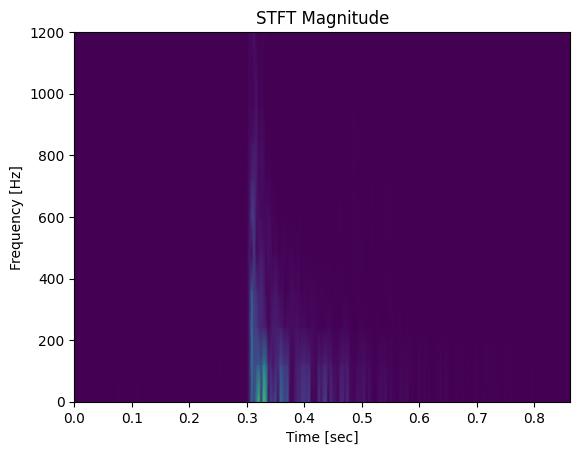

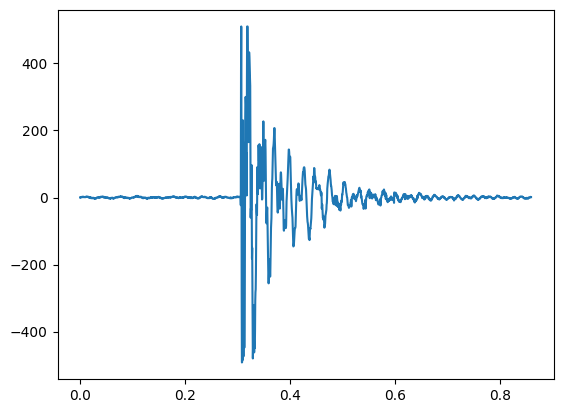

(1,) (208,) (1, 208)


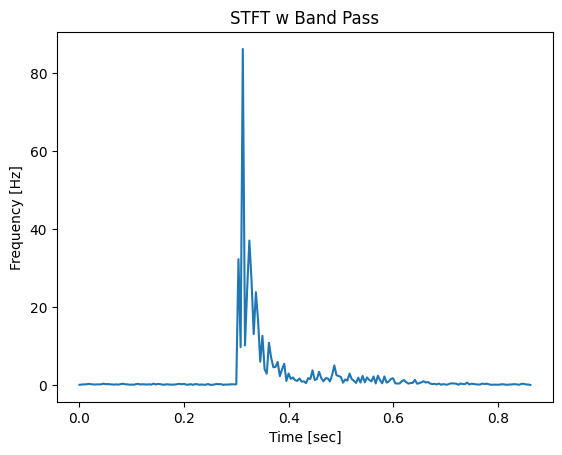

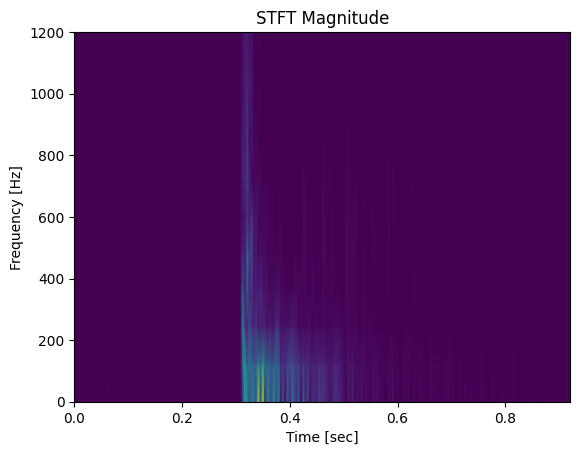

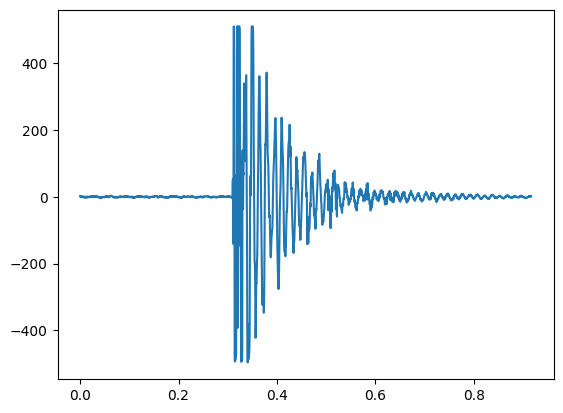

(1,) (222,) (1, 222)


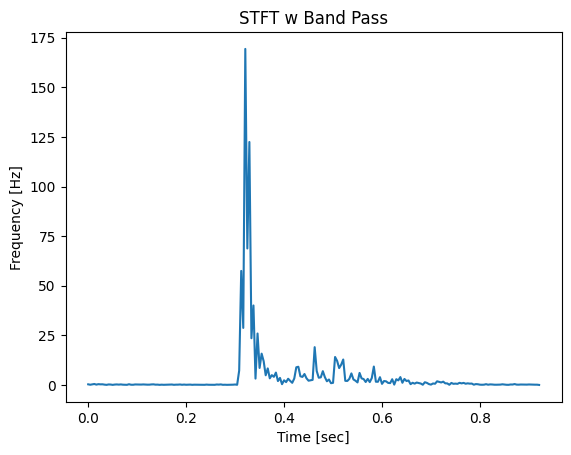

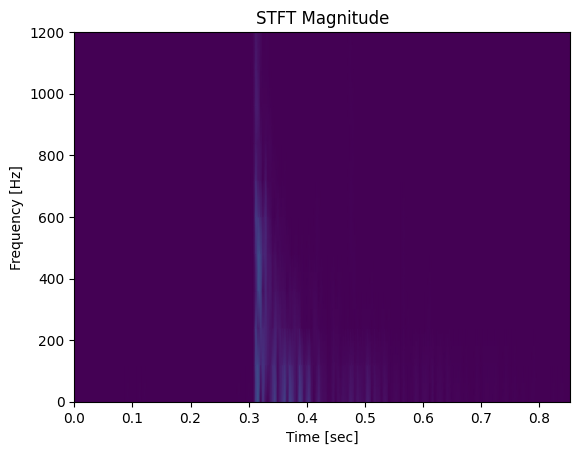

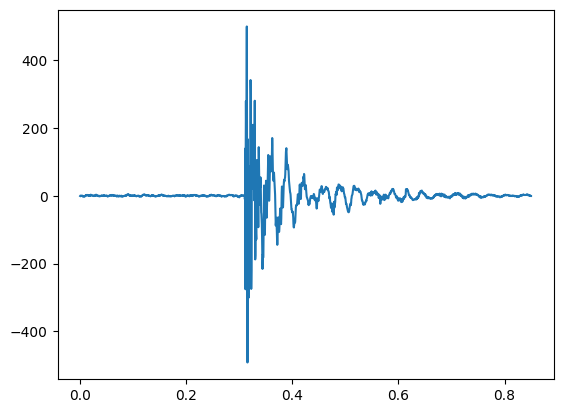

(1,) (206,) (1, 206)


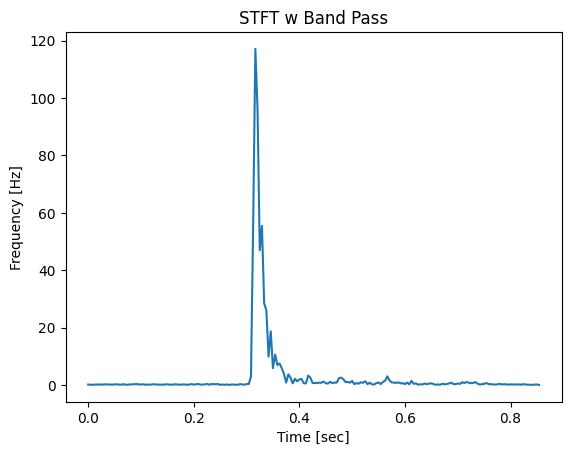

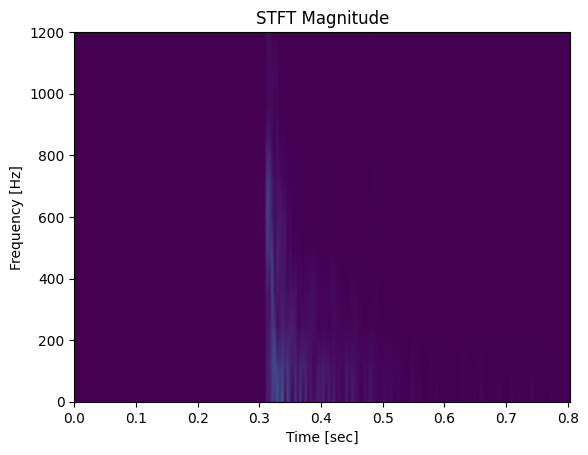

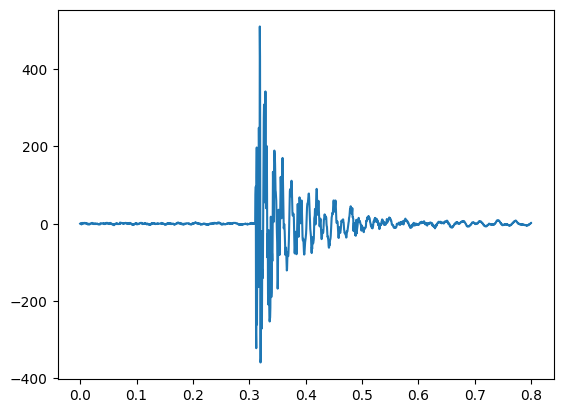

(1,) (194,) (1, 194)


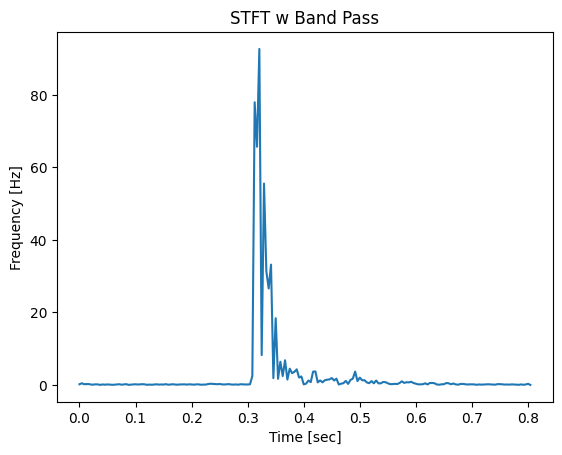

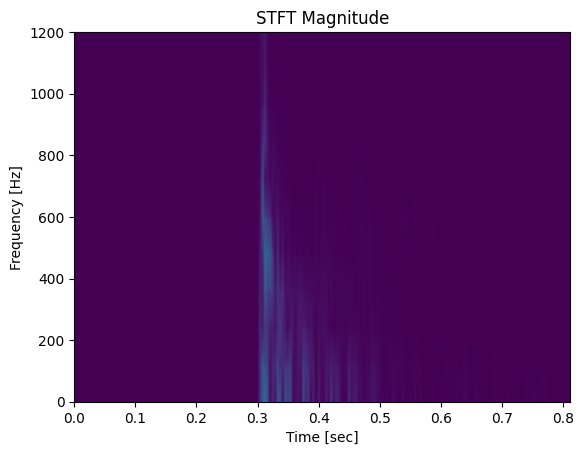

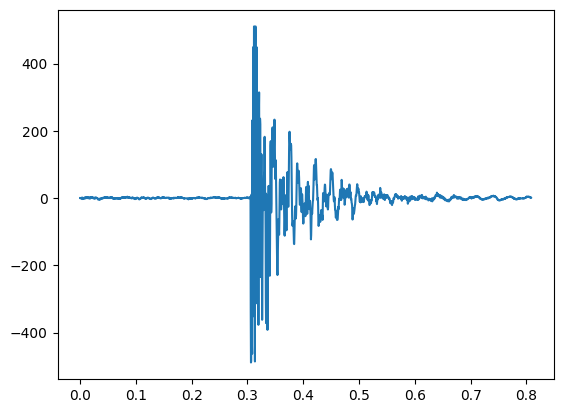

(1,) (196,) (1, 196)


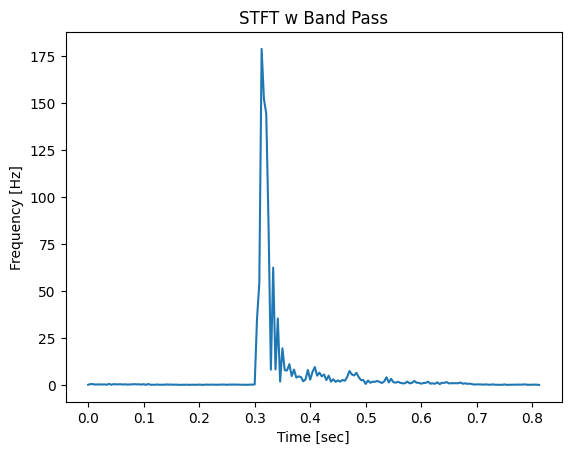

In [71]:
for loc in locs:
    ex2 = data["MP2"][loc]["NA"][0,0][0]
    f, t, Zxx = signal.stft(ex2,2400, nperseg=20)
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=ex2.max(), shading='gouraud')
    plt.title('STFT Magnitude')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()
    plt.plot(np.arange(0,len(ex2) / 2400,1/2400),ex2)
    plt.show()
    # band pass 400 - 600 Hz
    band = np.where(np.logical_and(f > 400, f < 600))
    f_band_pass = f[band]
    Zxx_band_pass = Zxx[band]
    print(f_band_pass.shape, t.shape, Zxx_band_pass.shape)
    plt.plot(t, np.abs(Zxx_band_pass[0]))
    plt.title('STFT w Band Pass')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()

M1


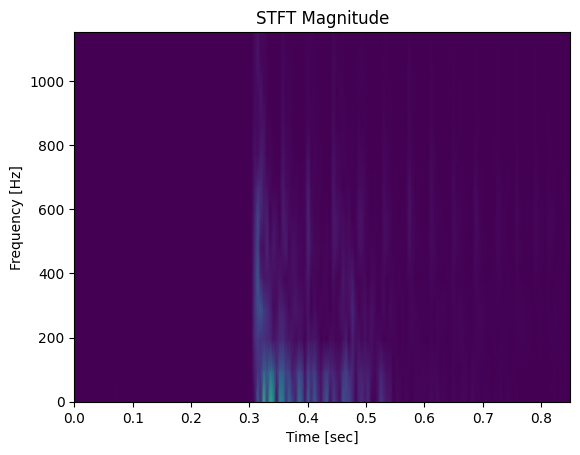

3.172776017119737
3.172776017119737
3.172776017119737


C:\Users\15593\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:57: ComplexWarning: Casting complex values to real discards the imaginary part
  return bound(*args, **kwds)


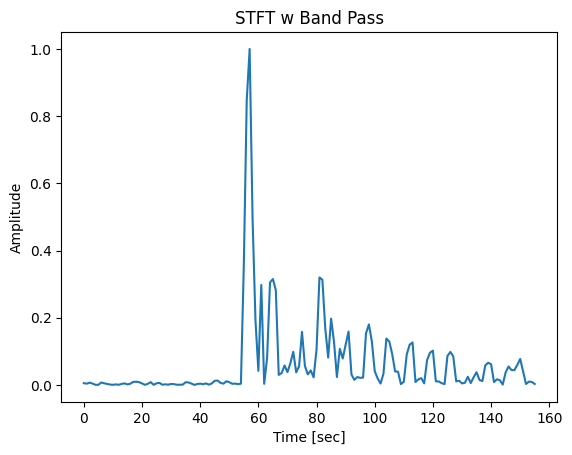

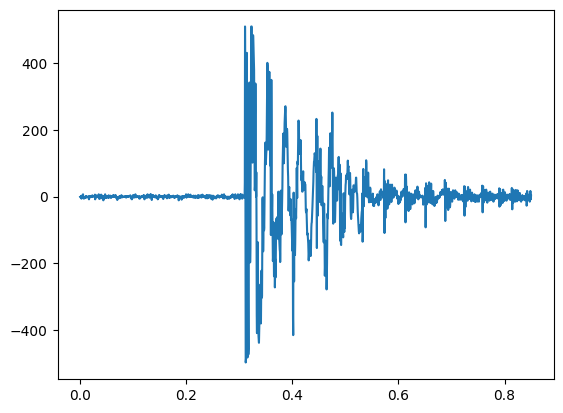

NA


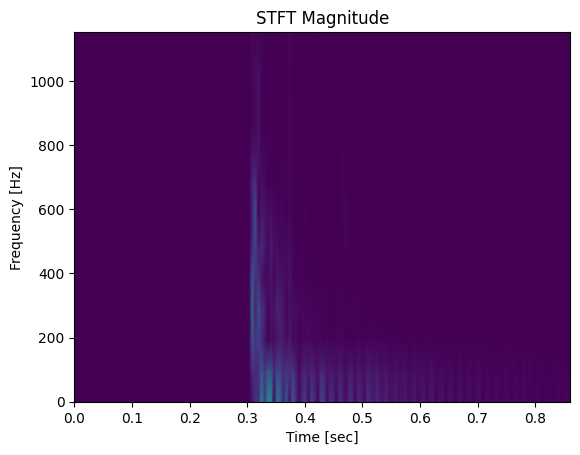

3.657252542228717
3.657252542228717


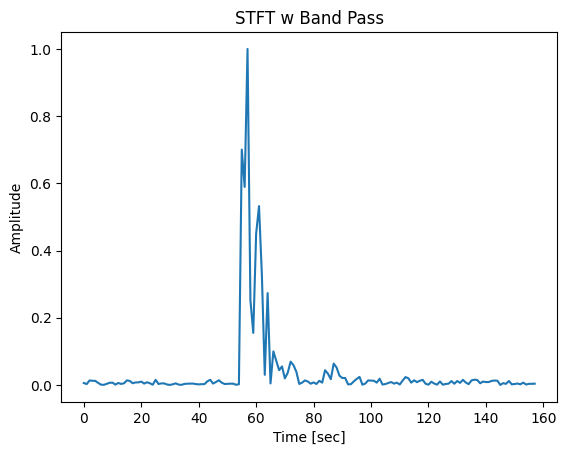

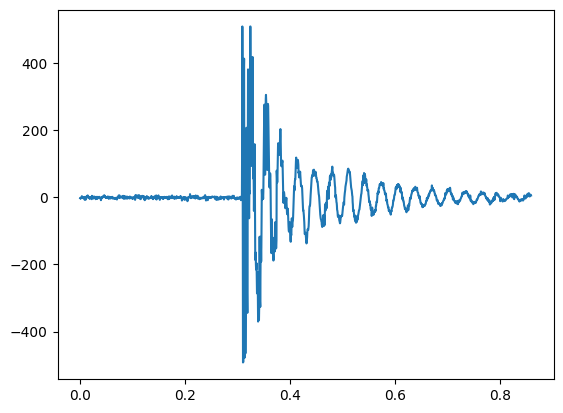

R1


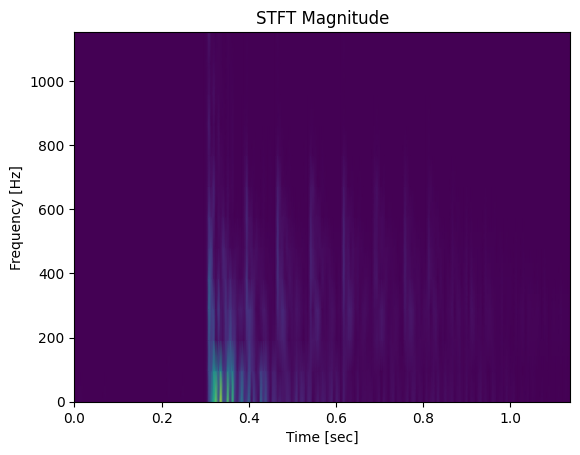

5.689984579982784
2.715224080816321
2.715224080816321


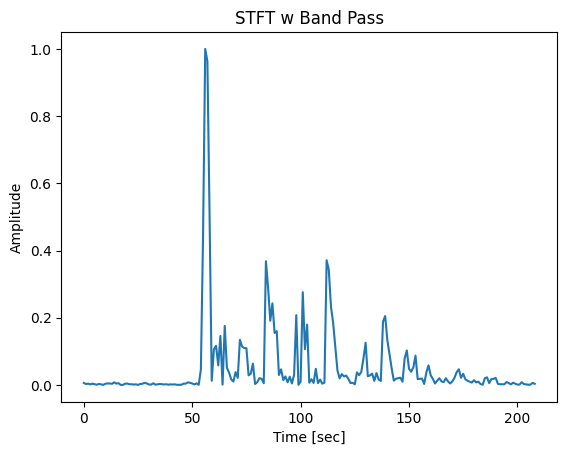

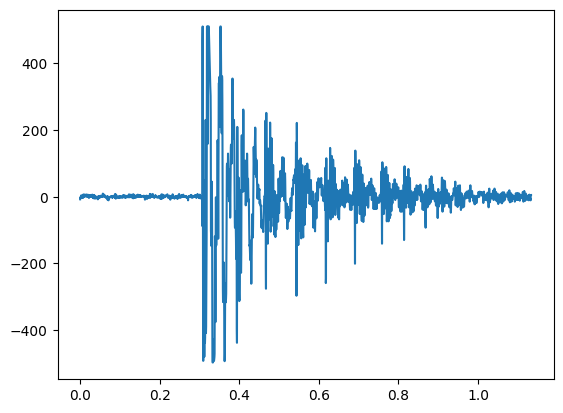

In [6]:
# example MP2 middle R1 / NA
from scipy import signal
for aug in augs:
    print(aug)
    # stft
    ex = data["Dong1"]["middle"][aug][0]
    ex = ex - ex.mean()
    
    # normalize raw signal
    eng = np.sqrt(np.sum(ex**2))
    # ex = ex / eng 
    
    f, t, Zxx = signal.stft(ex,2400, nperseg=25)
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=ex.max(), shading='gouraud')
    plt.title('STFT Magnitude')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()
    
    # band pass 400 - 500 Hz
    band = np.where(np.logical_and(f > 400, f < 500))
    f_band_pass = f[band]
    Zxx_band_pass = Zxx[band]
    # moving average for filtering
    # print(Zxx_band_pass.shape)
    def moving_average(a, n=3):
        ret = np.cumsum(a, dtype=float)
        ret[n:] = ret[n:] - ret[:-n]
        return ret[n - 1:] / n
    Zxx_band_pass = moving_average(Zxx_band_pass[0], n=3)

    # get abs
    Zxx_band_pass = np.abs(Zxx_band_pass)
    
    # set to normalized scale
    exp = np.max(Zxx_band_pass)
    # print(exp)
    Zxx_band_pass = Zxx_band_pass / exp
    n_peaks = list()
    for i in np.arange(0.1,1,0.1):
        peaks = signal.find_peaks(Zxx_band_pass, height=i, distance=7)
        n_peaks.append(len(peaks))
        # print(peaks[0], Zxx_band_pass)
        peak_values = Zxx_band_pass[peaks[0]]
        if len(peak_values) >= 2:
            print(peak_values[0] / peak_values[1])
    # finding peaks
    # scipy.signal.find_peaks(Zxx_band_pass, height=)
    
    # print(f_band_pass.shape, t.shape, Zxx_band_pass.shape)
    # plt.plot(t[:len(Zxx_band_pass)], Zxx_band_pass)
    plt.plot(Zxx_band_pass)
    plt.title('STFT w Band Pass')
    plt.ylabel('Amplitude')
    plt.xlabel('Time [sec]')
    plt.show()
    # raw
    plt.plot(np.arange(0,len(ex) / 2400,1/2400),ex)
    plt.show()

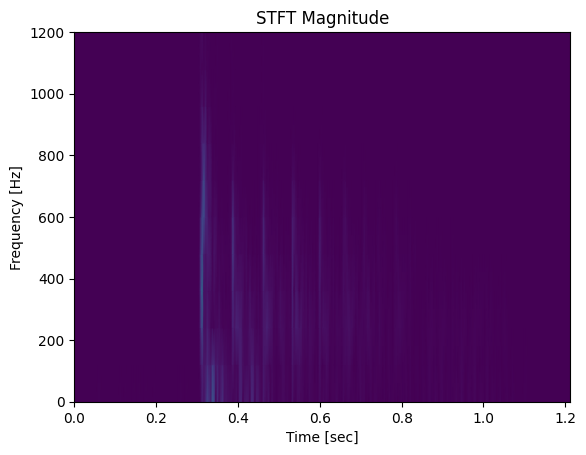

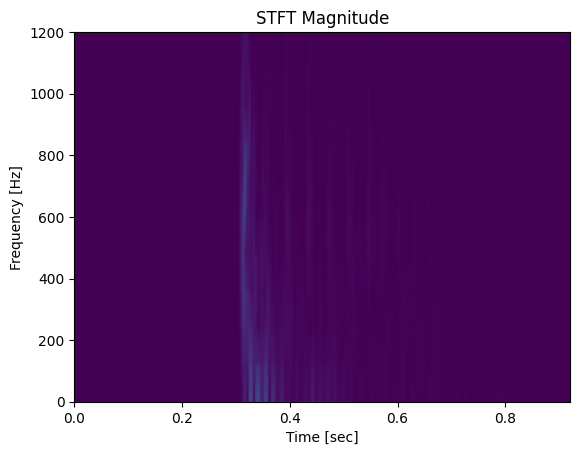

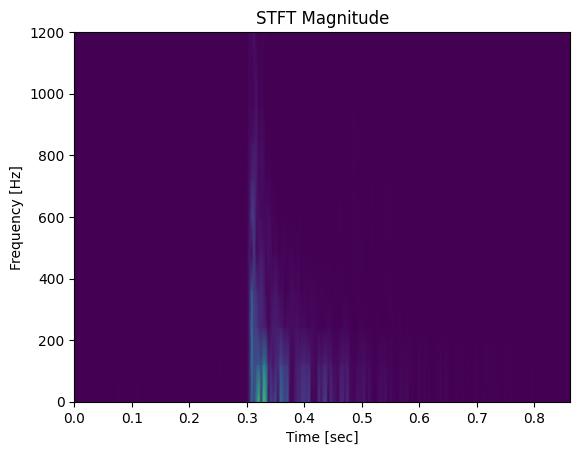

In [72]:
# stft
ex = data["MP2"]["middle"]["R1"][0,0][0]
f, t, Zxx = signal.stft(ex,2400, nperseg=20)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=ex.max(), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

ex = data["MP2"]["middle"]["M1"][0,0][0] # 560
f, t, Zxx = signal.stft(ex,2400, nperseg=20)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=ex.max(), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

ex = data["MP2"]["middle"]["NA"][0,0][0]
f, t, Zxx = signal.stft(ex,2400, nperseg=20)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=ex.max(), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


In [ ]:
# example MP2 middle R1 / NA
from scipy import signal
for loc in locs:
    # stft
    ex = data["MP2"][loc]["M1"][0,0][0]
    f, t, Zxx = signal.stft(ex,2400, nperseg=25)
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=ex.max(), shading='gouraud')
    plt.title('STFT Magnitude')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()
    
    # band pass 400 - 500 Hz
    band = np.where(np.logical_and(f > 400, f < 500))
    f_band_pass = f[band]
    Zxx_band_pass = Zxx[band]
    print(f_band_pass.shape, t.shape, Zxx_band_pass.shape)
    plt.plot(t, np.abs(Zxx_band_pass[0]))
    plt.title('STFT w Band Pass')
    plt.ylabel('Amplitude')
    plt.xlabel('Time [sec]')
    plt.show()
    # raw
    plt.plot(np.arange(0,len(ex) / 2400,1/2400),ex)
    plt.show()

In [6]:
# example MP2 middle R1 / NA
from scipy import signal, stats, optimize
for pers in ppl:
    for loc in locs:
        for aug in ["NA", "R1", "M1"]:
            n_features = list()
            for i in range(len(data[pers][loc][aug])):
                # stft
                ex = data[pers][loc][aug][i]
                ex = ex - ex.mean()
        
                # normalize raw signal
                eng = np.sqrt(np.sum(ex**2))
                # ex = ex / eng 
        
                f, t, Zxx = signal.stft(ex,2400, nperseg=25)
                # plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=ex.max(), shading='gouraud')
                # plt.title('STFT Magnitude')
                # plt.ylabel('Frequency [Hz]')
                # plt.xlabel('Time [sec]')
                # plt.show()
        
                # band pass 400 - 500 Hz
                band = np.where(np.logical_and(f > 400, f < 500))
                f_band_pass = f[band]
                Zxx_band_pass = Zxx[band]
                # moving average for filtering
                # print(Zxx_band_pass.shape)
                def moving_average(a, n=3):
                    ret = np.cumsum(a, dtype=float)
                    ret[n:] = ret[n:] - ret[:-n]
                    return ret[n - 1:] / n
                Zxx_band_pass = moving_average(Zxx_band_pass[0], n=3)
    
                # get abs
                Zxx_band_pass = np.abs(Zxx_band_pass)
        
                # set to normalized scale
                exp = np.max(Zxx_band_pass)
                Zxx_band_pass = Zxx_band_pass / exp

                # get number of peaks
                n_peaks = list()
                for i in np.arange(0.1,0.4,0.1):
                    peaks = signal.find_peaks(Zxx_band_pass, height=i, distance=7)[0]
                    n_peaks.append(len(peaks))
                    # print(peaks[0], Zxx_band_pass)

                # get line fit
                all_x_peaks = signal.find_peaks(Zxx_band_pass, height=0.1, distance=7)[0]
                all_y_peaks = Zxx_band_pass[all_x_peaks]
                res = stats.linregress(all_x_peaks, all_y_peaks)
                if not np.isnan(res.slope):
                    n_peaks.append(res.slope * 100)
                else:
                    n_peaks.append(-20)
                # print(res.intercept, res.slope)

                # exponential fit
                def func(x, a, b, c):
                    return a * np.exp(-b * x) + c
                if len(all_x_peaks) >= 3:
                    popt, pcov = optimize.curve_fit(func, all_x_peaks, all_y_peaks)
                    n_peaks.append(popt[1])
                else:
                    n_peaks.append(1)

                # OPTIONAL CHECK
                # print(all_x_peaks, all_y_peaks)
                # plt.plot(Zxx_band_pass)
                # xpos = np.arange(len(Zxx_band_pass))
                # plt.plot(xpos, res.intercept + res.slope*xpos, 'r')
                # plt.plot(xpos, func(xpos, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
                # plt.title('STFT w Band Pass')
                # plt.ylabel('Amplitude')
                # plt.xlabel('Time [sec]')
                # plt.legend()
                # plt.show()
                
                # get 1st peak ratio
                if len(all_y_peaks) >= 2:
                    n_peaks.append(all_y_peaks[0] / all_y_peaks[1])
                else:
                    n_peaks.append(100)
                # print(n_peaks)
                n_features.append(n_peaks)
            n_features = np.array(n_features)
            print(n_features)
            np.save(f"{pers}_{aug}_{loc}_features.npy",n_features)

C:\Users\15593\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:57: ComplexWarning: Casting complex values to real discards the imaginary part
  return bound(*args, **kwds)
C:\Users\15593\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
C:\Users\15593\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\15593\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
C:\Users\15593\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the

[[  2.           2.           1.           1.          -9.83155212
    1.           4.68437104]
 [  1.           1.           1.           1.         -20.
    1.         100.        ]
 [  2.           2.           1.           1.         -11.32238853
    1.           4.82083829]
 [  1.           1.           1.           1.         -20.
    1.         100.        ]
 [  2.           1.           1.           1.         -10.43378548
    1.           6.04971064]
 [  3.           1.           1.           1.          -2.70144744
    1.           6.90740039]
 [  2.           2.           1.           1.          -8.49538385
    1.           4.2478095 ]
 [  2.           1.           1.           1.          -7.33434033
    1.           8.34173341]
 [  2.           2.           2.           1.          -8.65397857
    1.           3.2501119 ]
 [  2.           1.           1.           1.          -8.75163078
    1.           8.0104506 ]
 [  1.           1.           1.           1.         -2

In [1]:
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tuning import svmTuning
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# GLOBAL VARS
prefix = "Mix_2_ALL_Features"
locations = ["middle", "topright", "bottomright", "bottomleft", "topleft"]
locs = locations
# augments = ["NA", "R1", "R2", "M1", "M2"]
augments = ["NA", "R1", "M1"]
augment_keys = {k:n for n,k in enumerate(augments)}
people = ["Yihong1"]

# WHOLE DATASET
location_variance = {}

for person in people:
    location_variance[person] = dict()
    d = location_variance[person]
    for location in locations:
        d[location] = {}
        for augment in augments:
            _arr = np.load(f"{person}_{augment}_{location}_features.npy")
            scaler = StandardScaler().set_output(transform="pandas")
            # scaler = MinMaxScaler().set_output(transform="pandas")
            _arr = np.c_[scaler.fit_transform(_arr[:,:7]), _arr[:,7:]]
            # print(_arr)
            # assert _arr.shape == (10,2), f"{prefix}_{person}_{augment}_{location}.csv in wrong shape: {_arr.shape}"
            # print(len(_arr))
            _arr = np.c_[_arr, np.ones(_arr.shape[0])*augment_keys[augment]]

            assert not np.isnan(_arr[:,7:]).any(), f"contains nan in {prefix}_{person}_{augment}_{location}.csv"

            
            # print(_arr)
            d[location][augment] = _arr

# EXAMPLE: M1_ALL_AUGMENTS_ALL_LOCATIONS
def tune(X_train, y_train, X_test, y_test):
    '''tunes both with linear and rbf. For our purposese, only show rsvm_acc'''
    # maxes = np.argsort(dataset[:,102:-1])[-10:]
    # define classifers
    clf_lsvm = SVC(kernel = 'linear')
    clf_rsvm = SVC(kernel = 'rbf')
    
    # tune and print result (tuned_lsvm, tuned_rsvm, lsvm_acc, rsvm_acc)
    results = svmTuning(X_train, y_train, X_test, y_test, clf_lsvm, clf_rsvm, 3)
    # print(results[2:])
    return results

def get_dataset(d):
    '''return copy of the dataset'''
    dataset = []
    for loc in locations:
        for aug in augments:
            dataset.extend(d[loc][aug])
    return np.array(dataset)

def get_dataset_location_picky(d, l):
    '''returns leave one out based on location of the dataset'''
    train = []
    test = []
    for loc in locations:
        if l == loc: 
            for aug in augments:
                test.extend(d[loc][aug])
            continue
        for aug in augments:
            train.extend(d[loc][aug])
    return np.array(train), np.array(test)


In [6]:
get_dataset(location_variance["Dong1"])

array([[ 0.80641938,  2.7080128 , -0.29488391, ...,  0.        ,
        -1.34327715,  0.        ],
       [ 0.80641938, -0.36927447, -0.29488391, ...,  0.        ,
        -1.24355211,  0.        ],
       [-0.68694984, -0.36927447, -0.29488391, ...,  0.        ,
         0.78228097,  0.        ],
       ...,
       [ 0.36010911, -0.91139339, -0.24382942, ...,  0.        ,
        -0.03522851,  2.        ],
       [ 0.82178747,  0.14836637,  0.47331594, ...,  0.        ,
         2.58042715,  2.        ],
       [-0.10156924,  0.67824625,  0.47331594, ...,  0.        ,
        -0.87091421,  2.        ]])

In [10]:
accuracy_results = list()
confusions = list()
for percentage in np.arange(0.1, 0.9, 0.2):
    percentage = np.round(percentage, 1)
    print(percentage)
    for loc in locs:
        _r = list()
        for _i in range(1):
            for person in people:
                # print(percentage, _i, bottle)
                rest_dataset, loc_dataset = get_dataset_location_picky(location_variance[person], loc)
                # total_size = len(rest_dataset) + len(loc_dataset)
                # X_train, _, y_train, _ = train_test_split(rest_dataset[:, :-1], rest_dataset[:, -1],
                #                                           train_size=percentage * total_size / len(rest_dataset))
                # _, X_test, _, y_test = train_test_split(loc_dataset[:, :-1], loc_dataset[:, -1],
                #                                         test_size=0.1 * total_size / len(loc_dataset))
                _, clf, _, acc = tune(rest_dataset[:, :-1], rest_dataset[:, -1], loc_dataset[:, :-1], loc_dataset[:, -1])
                _r.append(acc)
                confusions.append(confusion_matrix(y_test, clf.predict(X_test)))
        accuracy_results_percentage = [percentage, np.average(_r), np.std(_r)]
        print(accuracy_results_percentage)
        accuracy_results.append(accuracy_results_percentage)
np.save("confusions_bottles.npy", confusions)
np.save("results.npy", accuracy_results)


0.1
[0.1, 0.74, 0.0]
[0.1, 0.82, 0.0]
[0.1, 0.8523489932885906, 0.0]
[0.1, 0.38666666666666666, 0.0]
[0.1, 0.7466666666666667, 0.0]
0.3
[0.3, 0.74, 0.0]
[0.3, 0.82, 0.0]
[0.3, 0.8523489932885906, 0.0]
[0.3, 0.38666666666666666, 0.0]
[0.3, 0.7466666666666667, 0.0]
0.5
[0.5, 0.74, 0.0]
[0.5, 0.82, 0.0]
[0.5, 0.8523489932885906, 0.0]
[0.5, 0.38666666666666666, 0.0]
[0.5, 0.7466666666666667, 0.0]
0.7
[0.7, 0.74, 0.0]
[0.7, 0.82, 0.0]
[0.7, 0.8523489932885906, 0.0]
[0.7, 0.38666666666666666, 0.0]
[0.7, 0.7466666666666667, 0.0]


In [11]:
accuracy_results = list()
confusions = list()
for percentage in np.arange(0.1, 0.9, 0.2):
    percentage = np.round(percentage, 1)
    print(percentage)
    for loc in locs:
        _r = list()
        for _i in range(20):
            for person in people:
                # print(percentage, _i, bottle)
                loc_dataset = get_dataset(location_variance[person])
                total_size = len(rest_dataset) + len(loc_dataset)
                X_train, X_test, y_train, y_test = train_test_split(loc_dataset[:, :-1], loc_dataset[:, -1],
                                                          train_size=percentage, test_size=1)
                _, clf, _, acc = tune(X_train, y_train, X_test, y_test)
                _r.append(acc)
                confusions.append(confusion_matrix(y_test, clf.predict(X_test)))
        accuracy_results_percentage = [percentage, np.average(_r), np.std(_r)]
        print(accuracy_results_percentage)
        accuracy_results.append(accuracy_results_percentage)

0.1
[0.1, 0.55, 0.4974937185533099]
[0.1, 0.55, 0.49749371855331]
[0.1, 0.75, 0.4330127018922193]
[0.1, 0.7, 0.45825756949558394]
[0.1, 0.65, 0.4769696007084728]
0.3
[0.3, 0.65, 0.4769696007084728]
[0.3, 0.65, 0.47696960070847283]
[0.3, 0.8, 0.4]
[0.3, 0.8, 0.4]
[0.3, 0.8, 0.4]
0.5
[0.5, 0.55, 0.49749371855331]
[0.5, 0.75, 0.4330127018922193]
[0.5, 0.75, 0.4330127018922193]
[0.5, 0.75, 0.4330127018922193]
[0.5, 0.75, 0.4330127018922193]
0.7
[0.7, 0.65, 0.47696960070847283]
[0.7, 0.7, 0.45825756949558394]
[0.7, 0.85, 0.3570714214271425]
[0.7, 0.8, 0.4]
[0.7, 0.9, 0.30000000000000004]


In [27]:
percentage = np.round(0.9, 1)
print(percentage)
for loc in locs:
    _r = list()
    for _i in range(1):
        for person in people:
            # print(percentage, _i, bottle)
            loc_dataset = get_dataset(location_variance[person])
            # total_size = len(rest_dataset) + len(loc_dataset)
            X_train, X_test, y_train, y_test = train_test_split(loc_dataset[:, :-1], loc_dataset[:, -1],
                                                      train_size=percentage, random_state=10)
            _, clf, _, acc = tune(X_train, y_train, X_test, y_test)
            _r.append(acc)
            # confusions.append(confusion_matrix(y_test, clf.predict(X_test)))
    accuracy_results_percentage = [percentage, np.average(_r), np.std(_r)]
    print(accuracy_results_percentage)

0.9
[0.9, 0.9866666666666667, 0.0]
[0.9, 0.9866666666666667, 0.0]
[0.9, 0.9866666666666667, 0.0]
[0.9, 0.9866666666666667, 0.0]
[0.9, 0.9866666666666667, 0.0]


In [36]:
# KAA no LOO (90% training)
# MP1 MP2...
for person in ["Yihong1"]:
    print(person)
    for loc in locs:
        _r = list()
        for _i in range(20):
            # print(percentage, _i, bottle)
            # loc_dataset = get_dataset(location_variance[person])

            rest_dataset, loc_dataset = get_dataset_location_picky(location_variance[person], loc)
            locX_train, locX_test, locy_train, locy_test = train_test_split(loc_dataset[:, :-1], loc_dataset[:, -1],
                                                      train_size=0.9, random_state=_i, stratify=loc_dataset[:, -1])
            # restX_train, restX_test, resty_train, resty_test = train_test_split(rest_dataset[:, :-1], rest_dataset[:, -1],
                                                      # train_size=0.9, random_state=_i, stratify=rest_dataset[:, -1])
            # print(locy_test)
            # _, clf, _, acc = tune(np.concatenate((restX_train,locX_train)), np.concatenate((resty_train,locy_train)), locX_test, locy_test)
            _, clf, _, acc = tune(locX_train, locy_train, locX_test, locy_test)
            _r.append(acc)
            # confusions.append(confusion_matrix(y_test, clf.predict(X_test)))
        accuracy_results_percentage = [loc, np.average(_r), np.std(_r)]
        print(accuracy_results_percentage)
    # accuracy_results.append(accuracy_results_percentage)

Yihong1
['middle', 0.9533333333333335, 0.0635959467611297]
['topright', 0.9833333333333334, 0.03574601764921202]
['bottomright', 0.971875, 0.031093357409581877]
['bottomleft', 0.9733333333333334, 0.04422166387140532]
['topleft', 0.9533333333333334, 0.07916228058025279]


In [2]:
# KAP no LOO (90% training)
for loc in locs:
    _r = list()
    for _i in range(1):
        for person in people:
            # print(percentage, _i, bottle)
            # loc_dataset = get_dataset(location_variance[person])
            rest_dataset, loc_dataset = get_dataset_location_picky(location_variance[person], loc)
            loc_train, loc_test, locy_train, locy_test = train_test_split(loc_dataset[:, :-1], loc_dataset[:, -1],
                                                      train_size=0.9,random_state=_i)
            rest_train, rest_test, resty_train, resty_test = train_test_split(rest_dataset[:, :-1], rest_dataset[:, -1],
                                                      train_size=0.9,random_state=_i)
            _, clf, _, acc = tune(np.concatenate((rest_train,loc_train)), np.concatenate((resty_train,locy_train)), loc_test, locy_test)
            _r.append(acc)
            # confusions.append(confusion_matrix(y_test, clf.predict(X_test)))
    accuracy_results_percentage = [loc, np.average(_r), np.std(_r)]
    print(accuracy_results_percentage)
    # accuracy_results.append(accuracy_results_percentage)

['middle', 1.0, 0.0]
['topright', 0.9333333333333333, 0.0]
['bottomright', 0.9375, 0.0]
['bottomleft', 1.0, 0.0]
['topleft', 1.0, 0.0]
